In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
#tf.enable_eager_execution() in tensorflow 2.0 version eager_execution is enabled by default
print("Eager execution: {}".format(tf.executing_eagerly()))

Eager execution: True


In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import tensorflow_hub as hub
import keras
from keras.preprocessing import image

In [18]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [13]:
def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img,channels=3)
    img = tf.image.convert_image_dtype(img,tf.float32)
    img = img[tf.newaxis, :]
    return img
    

In [14]:
content_image = load_img(r"D:\AI ML DL\Neural Style Transfer\Golden gate bridge.jpg")
style_image =load_img(r"D:\AI ML DL\Neural Style Transfer\starry night.jpg")


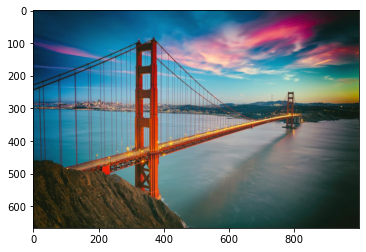

In [15]:
plt.imshow(np.squeeze(content_image))
plt.show()

In [17]:
content_image.shape

TensorShape([1, 667, 1000, 3])

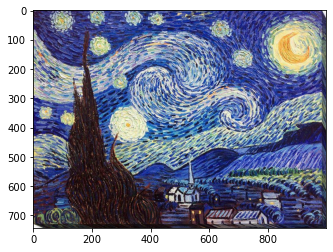

In [16]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [19]:
stylized_img = model(tf.constant(content_image),tf.constant(style_image))[0]

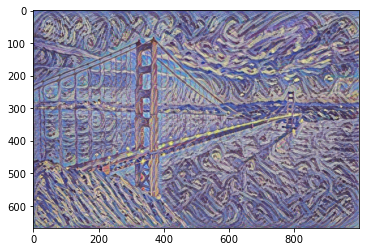

In [20]:
plt.imshow(np.squeeze(stylized_img))
plt.show()

In [22]:
cv2.imwrite('generated_img.jpg',cv2.cvtColor(np.squeeze(stylized_img)*255,cv2.COLOR_BGR2RGB))

True